In [1]:
# 下載 file_id 為 "1tX9GJnZFG5YrZEE6Kub9QOIs1_IDoDdZ" 的檔案，並將它命名為 winequality-red.csv
!gdown --id '1tX9GJnZFG5YrZEE6Kub9QOIs1_IDoDdZ' --output optput1
# 列出目前目錄下所有的檔案
!ls

Downloading...
From: https://drive.google.com/uc?id=1tX9GJnZFG5YrZEE6Kub9QOIs1_IDoDdZ
To: /content/optput1
100% 382k/382k [00:00<00:00, 49.4MB/s]
optput1  sample_data


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np
datasets = pd.read_csv('optput1')
datasets.head()


,p,x,s,n,t,p.1,f,c,n.1,k,e,e.1,s.1,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g


In [3]:
(datasets.astype(str) == ' ?').any(1)
datasets = datasets[~(datasets.astype(str) == ' ?').any(1)]
lack = datasets.isnull()

In [4]:
datasets.columns = ['edible-or-poisonous','cap-shape','cap-surface','cap-color','bruises','odor',
                   'gill-attachment','gill-spacing','gill-size','gill-color',
                   'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                   'stalk-surface-below-ring', 'stalk-color-above-ring','stalk-color-below-ring',
                   'veil-type','veil-color','ring-number','ring-type','spore-print-color',
                   'population','habitat']

In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in datasets.columns:
    datasets[col]=labelencoder.fit_transform(datasets[col])

In [6]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

Automatically created module for IPython interactive environment


In [7]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

In [8]:
db = DBSCAN(eps=0.3, min_samples=15).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

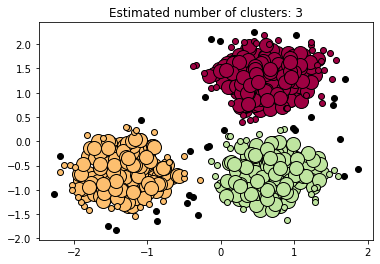

In [9]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [10]:
def purity(X, cluster_labels):
    cluster = np.array(X)
    label = np. array(cluster_labels)
    indedata1 = {}
    for p in np.unique(label):
        indedata1[p] = np.argwhere(label == p)
    indedata2 = {}
    for q in np.unique(cluster):
        indedata2[q] = np.argwhere(cluster == q)

    count_all = []
    for i in indedata1.values():
        count = []
        for j in indedata2.values():
            a = np.intersect1d(i, j).shape[0]
            count.append(a)
        count_all.append(count)

    return sum(np.max(count_all, axis=0))/len(cluster)


In [11]:
db = db.fit(datasets)
purity(labels_true,db.labels_)

1.0

In [15]:
import time

KKEDticks = time.process_time()
print('Kmeans所花費的時間為',KKEDticks-KKSTticks)

Kmeans所花費的時間為 0.011333685999999954
